In [126]:
import pandas as pd
import numpy as np

In [127]:
df= pd.read_csv(r'./datasets/deliveries.csv')

In [128]:
m= pd.read_csv(r'./datasets/imdb-top-1000.csv')

In [129]:
m.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [130]:
gen = m.groupby('Genre')

In [131]:
gen.min().head(2)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,300,1924,45,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,33.0
Adventure,2001: A Space Odyssey,1925,88,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,41.0


find the top 3 generes by total earnings

In [132]:
m.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(4)

Genre
Drama        3.540997e+10
Action       3.263226e+10
Comedy       1.566387e+10
Animation    1.463147e+10
Name: Gross, dtype: float64

find the genre with highest avg imbd rating

In [133]:
m.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)

Genre
Western      8.350000
Crime        8.016822
Fantasy      8.000000
Mystery      7.975000
Film-Noir    7.966667
Name: IMDB_Rating, dtype: float64

find the director with most popularity

In [134]:
m.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)

Director
Christopher Nolan    11578345
Quentin Tarantino     8123208
Steven Spielberg      7817166
David Fincher         6607859
Martin Scorsese       6513530
                       ...   
J. Lee Thompson         26457
Peter Mullan            25938
René Laloux             25229
Francis Lee             25198
Kaige Chen              25088
Name: No_of_Votes, Length: 548, dtype: int64

find highest rated movies of each genre

In [135]:
m.loc[m.groupby('Genre')['IMDB_Rating'].idxmax(),['Genre','IMDB_Rating','Series_Title']].head(5)

,Genre,IMDB_Rating,Series_Title
2,Action,9.0,The Dark Knight
21,Adventure,8.6,Interstellar
23,Animation,8.6,Sen to Chihiro no kamikakushi
7,Biography,8.9,Schindler's List
19,Comedy,8.6,Gisaengchung


In [136]:
m.groupby('Genre')['IMDB_Rating'].max()

Genre
Action       9.0
Adventure    8.6
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.2
Drama        9.3
Family       7.8
Fantasy      8.1
Film-Noir    8.1
Horror       8.5
Mystery      8.4
Thriller     7.8
Western      8.8
Name: IMDB_Rating, dtype: float64

In [137]:
m.loc[m.groupby('Genre')['IMDB_Rating'].idxmax(),['Genre','IMDB_Rating','Director']].head(5)

,Genre,IMDB_Rating,Director
2,Action,9.0,Christopher Nolan
21,Adventure,8.6,Christopher Nolan
23,Animation,8.6,Hayao Miyazaki
7,Biography,8.9,Steven Spielberg
19,Comedy,8.6,Bong Joon Ho


find no of movies done by each actors

In [138]:
m['Star1'].value_counts(ascending=False)

Star1
Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Humphrey Bogart       9
                     ..
Phil Harris           1
David Hemmings        1
John Lennon           1
Tallulah Bankhead     1
Bruce Lee             1
Name: count, Length: 660, dtype: int64

In [139]:
m.groupby('Star1')['Series_Title'].count()

Star1
Aamir Khan              7
Aaron Taylor-Johnson    1
Abhay Deol              1
Abraham Attah           1
Adam Driver             1
                       ..
Zbigniew Zamachowski    1
Zooey Deschanel         1
Çetin Tekindor          1
Éric Toledano           1
Ömer Faruk Sorak        1
Name: Series_Title, Length: 660, dtype: int64

In [140]:
m.groupby('Genre').size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [141]:
genre = m.groupby('Genre')

In [142]:
genre.first().head(5)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0


In [143]:
genre.last().head(5)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Escape from Alcatraz,1979,112,7.6,Don Siegel,Clint Eastwood,121731,43000000.0,76.0
Adventure,Kelly's Heroes,1970,144,7.6,Brian G. Hutton,Clint Eastwood,45338,1378435.0,50.0
Animation,The Jungle Book,1967,78,7.6,Wolfgang Reitherman,Phil Harris,166409,141843612.0,65.0
Biography,Midnight Express,1978,121,7.6,Alan Parker,Brad Davis,73662,35000000.0,59.0
Comedy,Breakfast at Tiffany's,1961,115,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0


In [144]:
genre.get_group('Horror').head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
75,Alien,1979,117,Horror,8.4,Ridley Scott,Sigourney Weaver,787806,78900000.0,89.0
271,The Thing,1982,109,Horror,8.1,John Carpenter,Kurt Russell,371271,13782838.0,57.0


In [145]:
genre.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [146]:
genre.sample()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
63,The Dark Knight Rises,2012,164,Action,8.4,Christopher Nolan,Christian Bale,1516346,448139099.0,78.0
366,G.O.R.A.,2004,127,Adventure,8.0,Ömer Faruk Sorak,Cem Yilmaz,56960,196206077.0,NaN
135,Klaus,2019,96,Animation,8.2,Sergio Pablos,Carlos Martínez López,104761,148596026.0,65.0
753,Argo,2012,120,Biography,7.7,Ben Affleck,Ben Affleck,572581,136025503.0,86.0
687,The King of Comedy,1982,109,Comedy,7.8,Martin Scorsese,Robert De Niro,88511,2500000.0,73.0
450,Rope,1948,80,Crime,8.0,Alfred Hitchcock,James Stewart,129783,466149116.0,73.0
82,Sunset Blvd.,1950,110,Drama,8.4,Billy Wilder,William Holden,201632,506055932.0,NaN
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN
309,The Third Man,1949,104,Film-Noir,8.1,Carol Reed,Orson Welles,158731,449191.0,97.0


In [147]:
genre.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


aggerator function

In [148]:
genre.agg({
    
    'Runtime':"mean",
    'IMDB_Rating':'mean',
    'Gross':'sum'
    
    
    
})

,Runtime,IMDB_Rating,Gross
Genre,,,
Action,129.046512,7.949419,3.263226e+10
Adventure,134.111111,7.937500,9.496922e+09
Animation,99.585366,7.930488,1.463147e+10
Biography,136.022727,7.938636,8.276358e+09
Comedy,112.129032,7.901290,1.566387e+10
Crime,126.392523,8.016822,8.452632e+09
Drama,124.737024,7.957439,3.540997e+10
Family,107.500000,7.800000,4.391106e+08
Fantasy,85.000000,8.000000,7.827267e+08


In [149]:
genre[['Gross','Runtime','IMDB_Rating']].agg(['min','max','sum'])

Gross                            Runtime              \
                   min          max           sum     min  max    sum   
Genre                                                                   
Action          3296.0  936662225.0  3.263226e+10      45  321  22196   
Adventure      61001.0  874211619.0  9.496922e+09      88  228   9656   
Animation     128985.0  873839108.0  1.463147e+10      71  137   8166   
Biography      21877.0  753585104.0  8.276358e+09      93  209  11970   
Comedy          1305.0  886752933.0  1.566387e+10      68  188  17380   
Crime           6013.0  790482117.0  8.452632e+09      80  229  13524   
Drama           3600.0  924558264.0  3.540997e+10      64  242  36049   
Family       4000000.0  435110554.0  4.391106e+08     100  115    215   
Fantasy    337574718.0  445151978.0  7.827267e+08      76   94    170   
Film-Noir     449191.0  123353292.0  1.259105e+08     100  108    312   
Horror         89029.0  298791505.0  1.034649e+09      71  122   1123   
Mystery      1035953.0  474203697.0  1.256417e+09      96  138   1429   
Thriller    17550741.0   17550741.0  1.755074e+07     108  108    108   
Western      5321508.0   31800000.0  5.822151e+07     132  165    593   

          IMDB_Rating               
                  min  max     sum  
Genre                               
Action            7.6  9.0  1367.3  
Adventure         7.6  8.6   571.5  
Animation         7.6  8.6   650.3  
Biography         7.6  8.9   698.6  
Comedy            7.6  8.6  1224.7  
Crime             7.6  9.2   857.8  
Drama             7.6  9.3  2299.7  
Family            7.8  7.8    15.6  
Fantasy           7.9  8.1    16.0  
Film-Noir         7.8  8.1    23.9  
Horror            7.6  8.5    87.0  
Mystery           7.6  8.4    95.7  
Thriller          7.8  7.8     7.8  
Western           7.8  8.8    33.4

find movies started with a for each group 14 group

In [150]:
def foo(group):
    return group['Series_Title'].str.startswith('A').sum()

In [151]:
genre.apply(foo)

C:\Users\karli\AppData\Local\Temp\ipykernel_5440\2031851770.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(foo)


Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

find ranking of each movie in the group according to imdb

In [152]:
def ran(a):
   a['genre_rank'] =a['IMDB_Rating'].rank(ascending=0)
   return a;

In [153]:
genre.apply(ran)

C:\Users\karli\AppData\Local\Temp\ipykernel_5440\2372924473.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(ran)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              genre_rank  
Genre                     
Action   2           1.0  
         5           2.0  
         8           3.5  
         10          3.5  
         13          6.0  
...                  ...  
Thriller 700         1.0  
Western  12          1.0  
         48          2.0  
         115         3.0  
         691         4.0  

[1000 rows x 11 columns]

normalize rating of each group rating

In [154]:
def nor(d):
    d['normalize_rating'] = (d['IMDB_Rating']-d['IMDB_Rating'].min())/(d['IMDB_Rating'].max()-d['IMDB_Rating'].min())
    return d

In [155]:
genre.apply(nor)

C:\Users\karli\AppData\Local\Temp\ipykernel_5440\1711254582.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(nor)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              normalize_rating  
Genre                           
Action   2            1.000000  
         5            0.928571  
         8            0.857143  
         10           0.857143  
         13           0.785714  
...                        ...  
Thriller 700               NaN  
Western  12           1.000000  
         48           0.700000  
         115          0.500000  
         691          0.000000  

[1000 rows x 11 columns]

Gross to votes ratio per genre

In [156]:
def grooss(d):
    d['Popularity ratio']= (d['Gross'].sum())/(d['No_of_Votes'].sum())
    return d

In [157]:
genre.apply(grooss)

C:\Users\karli\AppData\Local\Temp\ipykernel_5440\4212555817.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(grooss)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              Popularity ratio  
Genre                           
Action   2          451.455069  
         5          451.455069  
         8          451.455069  
         10         451.455069  
         13         451.455069  
...                        ...  
Thriller 700        632.846825  
Western  12          45.144676  
         48          45.144676  
         115         45.144676  
         691         45.144676  

[1000 rows x 11 columns]

. Weighted Average Rating (using votes as weight)
Weighted Rating (Genre)

	​
Weighted Rating (Genre)=
∑No_of_Votes
∑(IMDB_Rating×No_of_Votes)
	​

m

In [158]:
m.groupby('Genre').apply(lambda x: (x['IMDB_Rating']*x['No_of_Votes']).sum() / x['No_of_Votes'].sum())


C:\Users\karli\AppData\Local\Temp\ipykernel_5440\2643936203.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  m.groupby('Genre').apply(lambda x: (x['IMDB_Rating']*x['No_of_Votes']).sum() / x['No_of_Votes'].sum())


Genre
Action       8.123140
Adventure    8.020967
Animation    8.049062
Biography    8.076688
Comedy       7.942311
Crime        8.278686
Drama        8.148430
Family       7.800000
Fantasy      7.978549
Film-Noir    8.010789
Horror       8.033036
Mystery      8.190026
Thriller     7.800000
Western      8.588396
dtype: float64

Groupby on multiple columns

In [159]:
duo = m.groupby(['Director'	,'Star1'])

In [160]:
duo.size()

Director             Star1         
Aamir Khan           Amole Gupte       1
Aaron Sorkin         Eddie Redmayne    1
Abdellatif Kechiche  Léa Seydoux       1
Abhishek Chaubey     Shahid Kapoor     1
Abhishek Kapoor      Amit Sadh         1
                                      ..
Zaza Urushadze       Lembit Ulfsak     1
Zoya Akhtar          Hrithik Roshan    1
                     Vijay Varma       1
Çagan Irmak          Çetin Tekindor    1
Ömer Faruk Sorak     Cem Yilmaz        1
Length: 898, dtype: int64

In [161]:
duo['Gross'].sum().sort_values(ascending=0)

Director              Star1          
Akira Kurosawa        Toshirô Mifune     2.999877e+09
Anthony Russo         Joe Russo          2.205039e+09
Billy Wilder          William Holden     1.286779e+09
Christopher Nolan     Christian Bale     1.242940e+09
Werner Herzog         Klaus Kinski       1.124605e+09
                                             ...     
Jeong-beom Lee        Won Bin            6.460000e+03
Shane Meadows         Paddy Considine    6.013000e+03
Jaco Van Dormael      Jared Leto         3.600000e+03
Thomas Jahn           Til Schweiger      3.296000e+03
Anders Thomas Jensen  Ulrich Thomsen     1.305000e+03
Name: Gross, Length: 898, dtype: float64

find the avg OF metascore of actor and genre combo

In [162]:
m.groupby(['Genre','Star1'])['Metascore'].mean().reset_index().sort_values(by='Metascore',ascending=0)

,Genre,Star1,Metascore
819,Mystery,James Stewart,100.0
593,Drama,Cary Grant,100.0
653,Drama,Humphrey Bogart,100.0
732,Drama,Orson Welles,100.0
620,Drama,Ellar Coltrane,100.0
...,...,...,...
800,Fantasy,Werner Krauss,NaN
815,Mystery,Bernard-Pierre Donnadieu,NaN
820,Mystery,Jose Coronado,NaN
821,Mystery,Laurence Olivier,NaN


In [163]:
duo[['Gross','IMDB_Rating','Metascore']].agg(['mean','max'])

Gross              IMDB_Rating       \
                                           mean          max        mean  max   
Director            Star1                                                       
Aamir Khan          Amole Gupte       1223869.0    1223869.0         8.4  8.4   
Aaron Sorkin        Eddie Redmayne  853090410.0  853090410.0         7.8  7.8   
Abdellatif Kechiche Léa Seydoux       2199675.0    2199675.0         7.7  7.7   
Abhishek Chaubey    Shahid Kapoor   218428303.0  218428303.0         7.8  7.8   
Abhishek Kapoor     Amit Sadh         1122527.0    1122527.0         7.7  7.7   
...                                         ...          ...         ...  ...   
Zaza Urushadze      Lembit Ulfsak      144501.0     144501.0         8.2  8.2   
Zoya Akhtar         Hrithik Roshan    3108485.0    3108485.0         8.1  8.1   
                    Vijay Varma       5566534.0    5566534.0         8.0  8.0   
Çagan Irmak         Çetin Tekindor  461855363.0  461855363.0         8.3  8.3   
Ömer Faruk Sorak    Cem Yilmaz      196206077.0  196206077.0         8.0  8.0   

                                   Metascore        
                                        mean   max  
Director            Star1                           
Aamir Khan          Amole Gupte          NaN   NaN  
Aaron Sorkin        Eddie Redmayne      77.0  77.0  
Abdellatif Kechiche Léa Seydoux         89.0  89.0  
Abhishek Chaubey    Shahid Kapoor        NaN   NaN  
Abhishek Kapoor     Amit Sadh           40.0  40.0  
...                                      ...   ...  
Zaza Urushadze      Lembit Ulfsak       73.0  73.0  
Zoya Akhtar         Hrithik Roshan       NaN   NaN  
                    Vijay Varma         65.0  65.0  
Çagan Irmak         Çetin Tekindor       NaN   NaN  
Ömer Faruk Sorak    Cem Yilmaz           NaN   NaN  

[898 rows x 6 columns]

In [164]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

find the top 10  batman in term of run

In [165]:
df.head(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [166]:
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=0).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

find the batsman who hit most sixes

In [167]:
six =df[df['batsman_runs']==6]

In [168]:
six.groupby('batsman')['batsman'].count().sort_values(ascending=0).head(5)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

find the batsman who hit most six in last 15 -20 over

In [169]:
last = df[df['over']>15]

In [170]:
last =last[(last['batsman_runs']==4) | (last['batsman_runs']==6)]

In [171]:
last.groupby('batsman')['batsman'].count().sort_values(ascending=0)

batsman
MS Dhoni          340
RG Sharma         208
AB de Villiers    208
KA Pollard        206
V Kohli           160
                 ... 
AR Bawne            1
TS Mills            1
TA Boult            1
T Taibu             1
T Curran            1
Name: batsman, Length: 360, dtype: int64

find the virat kohli all team record

In [172]:
virat = df[df['batsman']=='V Kohli']

In [173]:
virat.shape

(4211, 21)

In [174]:
virat.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [175]:
virat.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [176]:
virat.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [177]:
virat.groupby('bowling_team')['batsman_runs'].sum().reset_index()

,bowling_team,batsman_runs
0,Chennai Super Kings,749
1,Deccan Chargers,306
2,Delhi Capitals,66
3,Delhi Daredevils,763
4,Gujarat Lions,283
5,Kings XI Punjab,636
6,Kochi Tuskers Kerala,50
7,Kolkata Knight Riders,675
8,Mumbai Indians,628
9,Pune Warriors,128


def create a function that can return highest score of any batman

In [178]:
high = df[df['batsman']=='V Kohli']
high.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=0).head(1)


match_id
626    113
Name: batsman_runs, dtype: int64

In [179]:
def highest(high):
    highs = df[df['batsman']==high]
    return highs.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=0).head(1)


In [180]:
highest('V Kohli')

match_id
626    113
Name: batsman_runs, dtype: int64

In [181]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

highest over in ipl

In [182]:
def highes(high):
    highs = df[df['bowler']==high]
    return highs.groupby('match_id')['over'].sum().sort_values(ascending=0).head(1)


In [183]:
highes('SL Malinga')

match_id
456    432
Name: over, dtype: int64

In [184]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [185]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Find the total runs scored by each batsman.

In [186]:
df.groupby('batsman')['total_runs'].sum().sort_values(ascending=0)

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
                  ... 
S Lamichhane         0
Sunny Gupta          0
Abdur Razzak         0
U Kaul               0
V Pratap Singh       0
Name: total_runs, Length: 516, dtype: int64

<Axes: xlabel='batsman'>

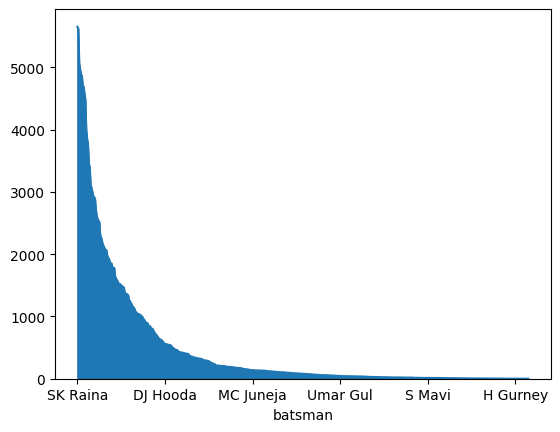

In [187]:
df.groupby('batsman')['total_runs'].sum().sort_values(ascending=0).plot(kind='area')

Find the total runs scored by each batting team.

In [ ]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
df[df['dismissal_kind'] == 'caught'] \
   .groupby('fielder')['player_dismissed'] \
   .count() \
   .sort_values(ascending=False) \
   .head(1)


fielder
KD Karthik    109
Name: player_dismissed, dtype: int64